<a href="https://colab.research.google.com/github/Anjali61034/Data-mining-practical/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -----------------------------
# Q1 — DATA CLEANING
# -----------------------------

import pandas as pd
import numpy as np

# Load dataset
# Replace path with your file name
df = pd.read_csv("file.csv", engine='python')

print("\n--- BEFORE CLEANING ---")
print(df.info())
print(df.isnull().sum())

# 1. Handling Missing Values
# Numeric => fill with median
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical => fill with mode
cat_cols = df.select_dtypes(include=['object']).columns
for c in cat_cols:
    df[c] = df[c].fillna(df[c].mode()[0])

# 2. Handling Outliers using IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))

# 3. Fix Inconsistent Values (example: strip spaces, lowercase)
for c in cat_cols:
    df[c] = df[c].astype(str).str.strip().str.lower()

print("\n--- AFTER CLEANING ---")
print(df.info())
print(df.isnull().sum())

# Save cleaned dataset
df.to_csv("cleaned_dataset.csv", index=False)
print("\nCleaned dataset saved as cleaned_dataset.csv")


--- BEFORE CLEANING ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52955 entries, 0 to 52954
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           52955 non-null  int64  
 1   CustomerID           52924 non-null  float64
 2   Gender               52924 non-null  object 
 3   Location             52924 non-null  object 
 4   Tenure_Months        52924 non-null  float64
 5   Transaction_ID       52924 non-null  float64
 6   Transaction_Date     52924 non-null  object 
 7   Product_SKU          52924 non-null  object 
 8   Product_Description  52924 non-null  object 
 9   Product_Category     52955 non-null  object 
 10  Quantity             52924 non-null  float64
 11  Avg_Price            52924 non-null  float64
 12  Delivery_Charges     52924 non-null  float64
 13  Coupon_Status        52924 non-null  object 
 14  GST                  52924 non-null  float64
 15  Date       

In [19]:
# FILE 1: preprocessing.py

import pandas as pd
from sklearn.datasets import load_iris, load_wine
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Binarizer
import numpy as np

# -----------------------------
# LOAD DATASETS
# -----------------------------
iris = load_iris()
wine = load_wine()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

print("\n=== ORIGINAL IRIS (first 5 rows) ===")
print(iris_df.head(), "\n")

print("=== ORIGINAL WINE (first 5 rows) ===")
print(wine_df.head(), "\n")

# -----------------------------
# STANDARDIZATION
# -----------------------------
std_scaler = StandardScaler()
iris_std = std_scaler.fit_transform(iris_df.iloc[:, :-1])
wine_std = std_scaler.fit_transform(wine_df.iloc[:, :-1])

print("=== IRIS Standardized (first 5 rows) ===")
print(pd.DataFrame(iris_std, columns=iris.feature_names).head(), "\n")

print("=== WINE Standardized (first 5 rows) ===")
print(pd.DataFrame(wine_std, columns=wine.feature_names).head(), "\n")

# -----------------------------
# NORMALIZATION (Min-Max)
# -----------------------------
norm_scaler = MinMaxScaler()
iris_norm = norm_scaler.fit_transform(iris_df.iloc[:, :-1])
wine_norm = norm_scaler.fit_transform(wine_df.iloc[:, :-1])

print("=== IRIS Normalized (first 5 rows) ===")
print(pd.DataFrame(iris_norm, columns=iris.feature_names).head(), "\n")

print("=== WINE Normalized (first 5 rows) ===")
print(pd.DataFrame(wine_norm, columns=wine.feature_names).head(), "\n")

# -----------------------------
# TRANSFORMATION (Log Transform)
# -----------------------------
iris_log = np.log1p(iris_df.iloc[:, :-1])
wine_log = np.log1p(wine_df.iloc[:, :-1])

print("=== IRIS Log Transformed (first 5 rows) ===")
print(iris_log.head(), "\n")

print("=== WINE Log Transformed (first 5 rows) ===")
print(wine_log.head(), "\n")

# -----------------------------
# AGGREGATION (Mean of features)
# -----------------------------
iris_df["agg_mean"] = iris_df.iloc[:, :-1].mean(axis=1)
wine_df["agg_mean"] = wine_df.iloc[:, :-1].mean(axis=1)

print("=== IRIS Aggregation Column Added (first 5 rows) ===")
print(iris_df.head(), "\n")

print("=== WINE Aggregation Column Added (first 5 rows) ===")
print(wine_df.head(), "\n")

# -----------------------------
# DISCRETIZATION / BINARIZATION
# -----------------------------
binz = Binarizer(threshold=iris_df["sepal length (cm)"].mean())
iris_bin = binz.fit_transform(iris_df[["sepal length (cm)"]])

binz2 = Binarizer(threshold=wine_df["alcohol"].mean())
wine_bin = binz2.fit_transform(wine_df[["alcohol"]])

print("=== IRIS Binarized sepal length (first 5 rows) ===")
print(pd.DataFrame(iris_bin, columns=["sepal_length_bin"]).head(), "\n")

print("=== WINE Binarized alcohol (first 5 rows) ===")
print(pd.DataFrame(wine_bin, columns=["alcohol_bin"]).head(), "\n")

# -----------------------------
# SAMPLING (Random Under-sampling)
# -----------------------------
iris_sample = iris_df.sample(frac=0.7, random_state=1)
wine_sample = wine_df.sample(frac=0.7, random_state=1)

print("=== IRIS Sampled 70% (first 5 rows) ===")
print(iris_sample.head(), "\n")

print("=== WINE Sampled 70% (first 5 rows) ===")
print(wine_sample.head(), "\n")

# Save preprocessed files
iris_df.to_csv("iris_preprocessed.csv", index=False)
wine_df.to_csv("wine_preprocessed.csv", index=False)

print("Preprocessing completed. Files saved:")
print("iris_preprocessed.csv")
print("wine_preprocessed.csv")



=== ORIGINAL IRIS (first 5 rows) ===
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0   

=== ORIGINAL WINE (first 5 rows) ===
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0          

In [17]:
# --------------------------------------------
# Q3 — APRIORI FOR YOUR SUPERSTORE DATASET
# --------------------------------------------
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="jupyter_client.session")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

# --------------------------------------------------------
# 1. Load your dataset (replace file name if different)
# --------------------------------------------------------
df = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")

# --------------------------------------------------------
# 2. Create bins for Sales, Discount, Profit
# --------------------------------------------------------
df['Sales_bin'] = pd.cut(df['Sales'], bins=10)
df['Discount_bin'] = pd.cut(df['Discount'], bins=10)
df['Profit_bin'] = pd.cut(df['Profit'], bins=10)

# --------------------------------------------------------
# 3. Convert each order into a basket of items
# --------------------------------------------------------
basket_rows = []

for index, row in df.iterrows():
    items = [
        "Customer_" + row["Customer Name"],
        "Category_" + row["Category"],
        "SubCategory_" + row["Sub Category"],
        "City_" + row["City"],
        "Region_" + row["Region"],
        "Sales_" + str(row["Sales_bin"]),
        "Discount_" + str(row["Discount_bin"]),
        "Profit_" + str(row["Profit_bin"]),
    ]

    for item in items:
        basket_rows.append([row["Order ID"], item])

basket_df = pd.DataFrame(basket_rows, columns=["OrderID", "Item"])

# --------------------------------------------------------
# 4. Convert to One-Hot Matrix
# --------------------------------------------------------
basket = basket_df.pivot_table(
    index='OrderID',
    columns='Item',
    aggfunc=lambda x: 1,
    fill_value=0
)

# The following line is removed as it causes IndexError: Too many levels
# basket.columns = basket.columns.get_level_values(1)

# --------------------------------------------------------
# Function: Run Apriori + Save Results
# --------------------------------------------------------
def run_apriori(data, minsup, minconf, label):
    freq = apriori(data, min_support=minsup, use_colnames=True)
    rules = association_rules(freq, metric="confidence", min_threshold=minconf)

    freq.to_csv(f"frequent_items_{label}.csv", index=False)
    rules.to_csv(f"association_rules_{label}.csv", index=False)

    print(f"\nSaved: frequent_items_{label}.csv")
    print(f"Saved: association_rules_{label}.csv")

# --------------------------------------------------------
# 5. Case A: Support 1%, Confidence 75%
# --------------------------------------------------------
run_apriori(basket, minsup=0.01, minconf=0.75, label="A")

# --------------------------------------------------------
# 6. Case B: Support 2%, Confidence 60%
# --------------------------------------------------------
run_apriori(basket, minsup=0.02, minconf=0.60, label="B")


Saved: frequent_items_A.csv
Saved: association_rules_A.csv

Saved: frequent_items_B.csv
Saved: association_rules_B.csv


In [16]:
# -------------------------------------------
# APRIORI FOR THE GIVEN DATASET (T1 to T5)
# -------------------------------------------

# Install library (Colab only)
# !pip install mlxtend pandas
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="jupyter_client.session")
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Given dataset
dataset = [
    ['milk', 'bread', 'nuts', 'apple'],   # T1
    ['milk', 'bread', 'apple'],           # T2
    ['milk', 'bread'],                    # T3
    ['milk', 'bread', 'apple'],           # T4
    ['milk', 'bread', 'nuts']             # T5
]

# Convert to one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

print("Transaction Dataset:")
print(df)

# -------------------------------------------
# CASE (a): min support = 50%, confidence = 75%
# -------------------------------------------
print("\n=== CASE (a): Support = 0.50, Confidence = 0.75 ===")

freq_a = apriori(df, min_support=0.50, use_colnames=True)
print("\nFrequent Itemsets (Case A):")
print(freq_a)

rules_a = association_rules(freq_a, metric="confidence", min_threshold=0.75)
print("\nAssociation Rules (Case A):")
print(rules_a[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# -------------------------------------------
# CASE (b): min support = 60%, confidence = 60%
# -------------------------------------------
print("\n=== CASE (b): Support = 0.60, Confidence = 0.60 ===")

freq_b = apriori(df, min_support=0.60, use_colnames=True)
print("\nFrequent Itemsets (Case B):")
print(freq_b)

rules_b = association_rules(freq_b, metric="confidence", min_threshold=0.60)
print("\nAssociation Rules (Case B):")
print(rules_b[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Transaction Dataset:
   apple  bread  milk   nuts
0   True   True  True   True
1   True   True  True  False
2  False   True  True  False
3   True   True  True  False
4  False   True  True   True

=== CASE (a): Support = 0.50, Confidence = 0.75 ===

Frequent Itemsets (Case A):
   support              itemsets
0      0.6               (apple)
1      1.0               (bread)
2      1.0                (milk)
3      0.6        (bread, apple)
4      0.6         (apple, milk)
5      1.0         (bread, milk)
6      0.6  (bread, apple, milk)

Association Rules (Case A):
      antecedents    consequents  support  confidence  lift
0         (apple)        (bread)      0.6         1.0   1.0
1         (apple)         (milk)      0.6         1.0   1.0
2         (bread)         (milk)      1.0         1.0   1.0
3          (milk)        (bread)      1.0         1.0   1.0
4  (bread, apple)         (milk)      0.6         1.0   1.0
5   (apple, milk)        (bread)      0.6         1.0   1.0
6         

In [15]:
# FILE 2: classifiers_iris.py
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Standardization
sc = StandardScaler()
X = sc.fit_transform(X)

# Models
models = {
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=0)
}

# -----------------------------
# HOLDOUT 1 — 80% train, 20% test
# -----------------------------
print("\n\n===== HOLDOUT: 80/20 Split =====")
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=1)

for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(Xtr, ytr)
    pred = model.predict(Xte)
    print(classification_report(yte, pred))
    print("Accuracy:", accuracy_score(yte, pred))

# -----------------------------
# HOLDOUT 2 — 66.6% train, 33.3% test
# -----------------------------
print("\n\n===== HOLDOUT: 66.6/33.3 Split =====")
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.333, random_state=1)

for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(Xtr, ytr)
    pred = model.predict(Xte)
    print(classification_report(yte, pred))
    print("Accuracy:", accuracy_score(yte, pred))

# -----------------------------
# CROSS VALIDATION
# -----------------------------
scoring = ["accuracy", "precision_macro", "recall_macro", "f1_macro"]

# 10-FOLD CV
print("\n\n===== 10-FOLD CROSS VALIDATION =====")
for name, model in models.items():
    results = cross_validate(model, X, y, cv=10, scoring=scoring)
    print(f"\n--- {name} ---")
    for m in scoring:
        print(f"{m}: {results['test_' + m].mean():.4f}")

# 5-FOLD CV
print("\n\n===== 5-FOLD CROSS VALIDATION =====")
for name, model in models.items():
    results = cross_validate(model, X, y, cv=5, scoring=scoring)
    print(f"\n--- {name} ---")
    for m in scoring:
        print(f"{m}: {results['test_' + m].mean():.4f}")




===== HOLDOUT: 80/20 Split =====

--- Naive Bayes ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667

--- KNN ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Accuracy: 0.9666666666666667

--- Decision Tree ---
              precision    recall  f1-score   support

           0       1.00      1.00

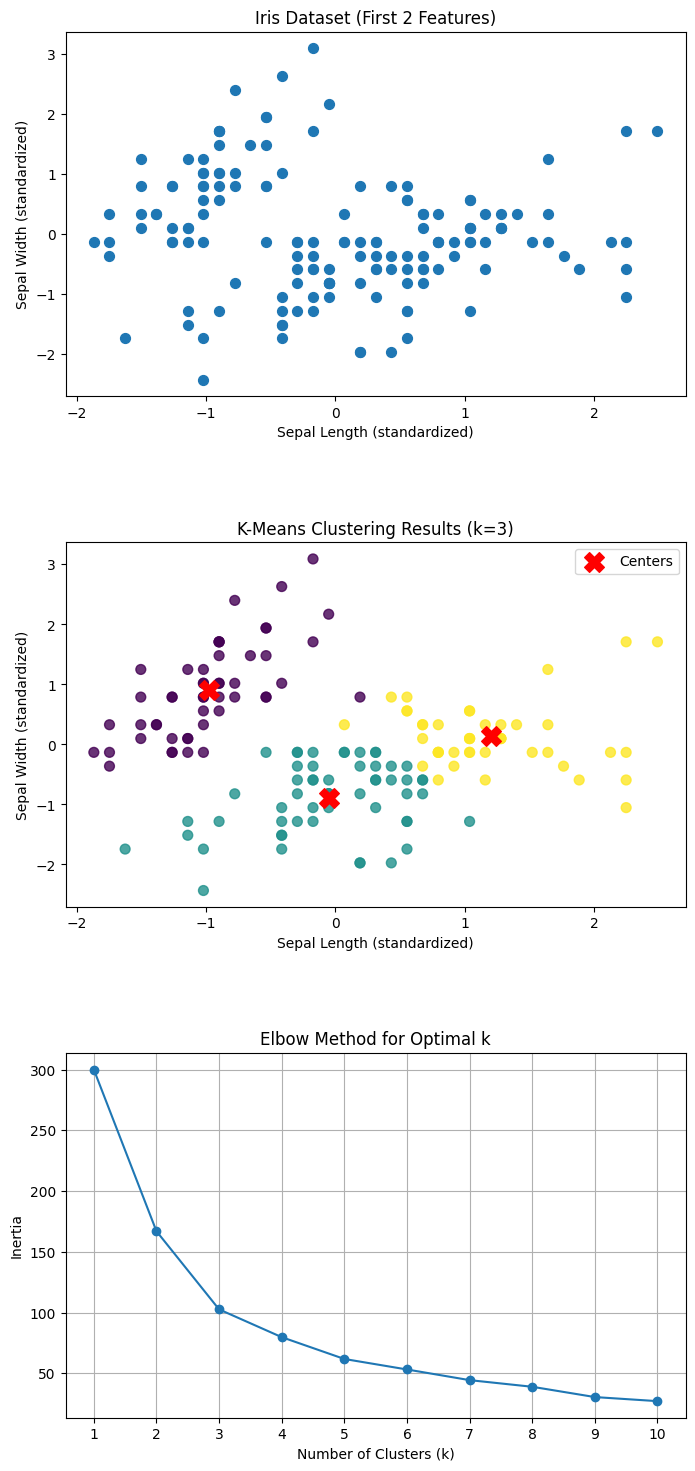

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# -----------------------
# LOAD IRIS DATA
# -----------------------
iris = load_iris()
X = iris.data[:, :2]    # use first 2 features so plot is visible

# Standardize for better clustering
sc = StandardScaler()
X_std = sc.fit_transform(X)

# -----------------------
# CREATE 3-PLOT FIGURE
# -----------------------
fig, axs = plt.subplots(3, 1, figsize=(8, 18))
fig.subplots_adjust(hspace=0.4)

# -----------------------
# PLOT 1: Original Iris Data
# -----------------------
axs[0].scatter(X_std[:, 0], X_std[:, 1], s=50)
axs[0].set_title("Iris Dataset (First 2 Features)")
axs[0].set_xlabel("Sepal Length (standardized)")
axs[0].set_ylabel("Sepal Width (standardized)")

# -----------------------
# APPLY K-MEANS
# -----------------------
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_std)
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# -----------------------
# PLOT 2: K-Means Clustering
# -----------------------
axs[1].scatter(X_std[:, 0], X_std[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8)
axs[1].scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centers')
axs[1].set_title("K-Means Clustering Results (k=3)")
axs[1].set_xlabel("Sepal Length (standardized)")
axs[1].set_ylabel("Sepal Width (standardized)")
axs[1].legend()

# -----------------------
# PLOT 3: Elbow Method
# -----------------------
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans_elbow = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_elbow.fit(X_std)
    inertia.append(kmeans_elbow.inertia_)

axs[2].plot(k_range, inertia, marker='o')
axs[2].set_title("Elbow Method for Optimal k")
axs[2].set_xlabel("Number of Clusters (k)")
axs[2].set_ylabel("Inertia")
axs[2].set_xticks(k_range)
axs[2].grid(True)

# -----------------------
# SAVE THE FIGURE
# -----------------------
plt.savefig('iris_kmeans_plots.png', bbox_inches='tight', dpi=150)

# Show all 3 plots
plt.show()
